In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.datasets import load_files
import spacy
import re

In [6]:
dir = "bbc/"
data = load_files(dir,encoding='utf-8',decode_error="replace")

In [8]:
list(zip(data["data"],data["target"]))[:5]

[('Tate & Lyle boss bags top award\n\nTate & Lyle\'s chief executive has been named European Businessman of the Year by a leading business magazine.\n\nIain Ferguson was awarded the title by US publication Forbes for returning one of the UK\'s "venerable" manufacturers to the country\'s top 100 companies. The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth. Tate\'s shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.\n\n"After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain\'s venerable manufacturers has returned to the vaunted index," Forbes said. Mr Ferguson took the helm at the company in 2003, after spending most of his career at consumer goods giant Unilever. Tate & Lyle, which was an original member of the historic FT-30 index in 1935, operates more than 41 factories and 20 more additional production facilities in 28 countries. Pr

In [9]:
data["target_names"]

['business', 'entertainment', 'politics', 'sport', 'tech']

In [11]:
data["filenames"]

array(['bbc/business\\385.txt', 'bbc/tech\\160.txt',
       'bbc/politics\\090.txt', ..., 'bbc/entertainment\\254.txt',
       'bbc/entertainment\\326.txt', 'bbc/sport\\341.txt'], dtype='<U25')

In [15]:
df = pd.DataFrame(data={"data":data["data"],"target":data["target"]})

In [16]:
df.head()

,data,target
0,Tate & Lyle boss bags top award\n\nTate & Lyle...,0
1,Halo 2 sells five million copies\n\nMicrosoft ...,4
2,MSPs hear renewed climate warning\n\nClimate c...,2
3,Pavey focuses on indoor success\n\nJo Pavey wi...,3
4,Tories reject rethink on axed MP\n\nSacked MP ...,2


In [17]:
df.head(30)

,data,target
0,Tate & Lyle boss bags top award\n\nTate & Lyle...,0
1,Halo 2 sells five million copies\n\nMicrosoft ...,4
2,MSPs hear renewed climate warning\n\nClimate c...,2
3,Pavey focuses on indoor success\n\nJo Pavey wi...,3
4,Tories reject rethink on axed MP\n\nSacked MP ...,2
5,Lib Dems predict 'best ever poll'\n\nThe Lib D...,2
6,Howard attacks 'pay later' Budget\n\nTory lead...,2
7,Games win for Blu-ray DVD format\n\nThe next-g...,4
8,Labour pig poster 'anti-Semitic'\n\nThe Labour...,2
9,Costin aims for comeback in 2006\n\nJamie Cost...,3


In [19]:
df["target"].value_counts()

target
3    511
0    510
2    417
4    401
1    386
Name: count, dtype: int64

In [26]:
cls = dict.fromkeys(data["target_names"],i)
i = 0
for k in cls.keys():
    cls[k] = i
    i+=1
cls
cls2 = {}
for k,v in cls.items():
    cls2[v] = k

cls2

{0: 'business', 1: 'entertainment', 2: 'politics', 3: 'sport', 4: 'tech'}

In [27]:
df["class"] = df["target"].map(cls2)

In [28]:
df.head()

,data,target,class
0,Tate & Lyle boss bags top award\n\nTate & Lyle...,0,business
1,Halo 2 sells five million copies\n\nMicrosoft ...,4,tech
2,MSPs hear renewed climate warning\n\nClimate c...,2,politics
3,Pavey focuses on indoor success\n\nJo Pavey wi...,3,sport
4,Tories reject rethink on axed MP\n\nSacked MP ...,2,politics


In [31]:
nlp = spacy.load("en_core_web_sm")

In [40]:
df["data"][0]

'Tate & Lyle boss bags top award\n\nTate & Lyle\'s chief executive has been named European Businessman of the Year by a leading business magazine.\n\nIain Ferguson was awarded the title by US publication Forbes for returning one of the UK\'s "venerable" manufacturers to the country\'s top 100 companies. The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth. Tate\'s shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.\n\n"After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain\'s venerable manufacturers has returned to the vaunted index," Forbes said. Mr Ferguson took the helm at the company in 2003, after spending most of his career at consumer goods giant Unilever. Tate & Lyle, which was an original member of the historic FT-30 index in 1935, operates more than 41 factories and 20 more additional production facilities in 28 countries. Prev

In [52]:
a = df["data"][0]

In [53]:
a= re.sub(r"[\n\t]","",a)
a = re.sub(r"[\"\']"," ",a)
a = re.sub("\s+[\w]\s+"," ",a)
a = re.sub("\s+"," ",a)
a = re.sub(r"[&|^%><$#@*]", "", a)

In [54]:
a

'Tate  Lyle boss bags top awardTate  Lyle chief executive has been named European Businessman of the Year by leading business magazine.Iain Ferguson was awarded the title by US publication Forbes for returning one of the UK venerable manufacturers to the country top 100 companies. The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth. Tate shares have leapt 55 this year, boosted by firming sugar prices and sales of its artificial sweeteners. After years of sagging stock price and seven-year hiatus from the FTSE 100, one of Britain venerable manufacturers has returned to the vaunted index, Forbes said. Mr Ferguson took the helm at the company in 2003, after spending most of his career at consumer goods giant Unilever. Tate  Lyle, which was an original member of the historic FT-30 index in 1935, operates more than 41 factories and 20 more additional production facilities in 28 countries. Previous winners of the Forbes award include

In [55]:
def process(txt):    
    re.sub(r"[\n\t]","",txt)
    re.sub(r"[\"\']"," ",txt)
    txt = re.sub("\s+[\w]\s+"," ",txt)
    txt = re.sub("\s+"," ",txt)
    txt = re.sub(r"[&|^%><$#@*]", "", txt)
    l = []
    doc = nlp(txt)
    for tok in doc:
        if not (tok.is_punct or tok.is_space or tok.is_stop):
            l.append(tok.lemma_)
    return " ".join(l)

In [56]:
df["pro_data"] = df["data"].apply(process)

In [58]:
df.head()

,data,target,class,pro_data
0,Tate & Lyle boss bags top award\n\nTate & Lyle...,0,business,Tate Lyle boss bag award Tate Lyle chief execu...
1,Halo 2 sells five million copies\n\nMicrosoft ...,4,tech,Halo sell million copy Microsoft celebrate bum...
2,MSPs hear renewed climate warning\n\nClimate c...,2,politics,msp hear renew climate warn climate change com...
3,Pavey focuses on indoor success\n\nJo Pavey wi...,3,sport,Pavey focus indoor success Jo Pavey miss Janua...
4,Tories reject rethink on axed MP\n\nSacked MP ...,2,politics,tory reject rethink axe MP Sacked MP Howard Fl...


In [60]:
vec = TfidfVectorizer()
tf_idf = vec.fit_transform(df["pro_data"].values)

In [61]:
km = MiniBatchKMeans(5)
km.fit(tf_idf)

C:\Users\ELmohannd\anaconda3\envs\tensorflow3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ELmohannd\anaconda3\envs\tensorflow3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


MiniBatchKMeans(n_clusters=5)

In [62]:
km.predict(tf_idf)[:20]

array([2, 1, 2, 1, 4, 4, 4, 0, 4, 1, 1, 0, 2, 1, 4, 0, 2, 2, 1, 3])

In [64]:
km.cluster_centers_

array([[1.27078958e-04, 8.79000426e-03, 6.91416165e-05, ...,
        2.50802652e-04, 0.00000000e+00, 4.37096969e-04],
       [3.09213443e-04, 5.65338469e-03, 0.00000000e+00, ...,
        0.00000000e+00, 4.65568703e-04, 0.00000000e+00],
       [3.42733307e-05, 1.24513069e-02, 0.00000000e+00, ...,
        1.76403983e-05, 0.00000000e+00, 0.00000000e+00],
       [1.39634682e-04, 1.01700288e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.37660160e-04, 1.25037154e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [74]:
pca = PCA(n_components=2, random_state=100)
red_feat = pca.fit_transform(tf_idf.toarray())
red_feat

array([[-0.0331749 ,  0.02536726],
       [-0.12024135,  0.02796134],
       [-0.00475156,  0.02362668],
       ...,
       [-0.08330409, -0.00962652],
       [-0.09838353, -0.11412419],
       [-0.09697601, -0.12408339]])

In [76]:
red_cen = pca.transform(km.cluster_centers_)
red_cen

array([[-0.04237513, -0.02694975],
       [-0.08272918, -0.10051269],
       [ 0.01636685,  0.07637967],
       [-0.02858812,  0.12385537],
       [ 0.24821122, -0.06819573]])

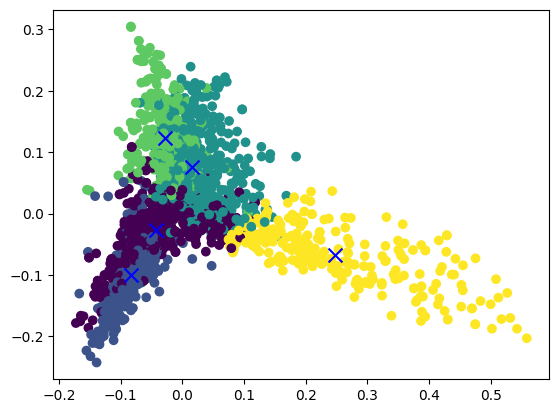

In [88]:
plt.scatter(red_feat[:,0], red_feat[:,1], c=km.predict(tf_idf))
plt.scatter(red_cen[:, 0], red_cen[:,1], marker='x', s=100, c='blue')
plt.show()